In [1]:
import sklearn
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
warpless = np.fromfile("../data/happylee4-smb-warpless.fm2_ram.bin", dtype=np.uint8, count=-1).reshape((-1, 2048))
print(warpless.shape)
warped = np.fromfile("../data/happylee-supermariobros,warped.fm2_ram.bin", dtype=np.uint8, count=-1).reshape((-1, 2048))
print(warped.shape)
glitchless = np.fromfile("../data/glitchless_mario_betr_then_adleikat.fm2_ram.bin", dtype=np.uint8, count=-1).reshape(
    (-1, 2048))
print(glitchless.shape)

(67205, 2048)
(17869, 2048)
(18542, 2048)


In [4]:
glitchless_index = np.arange(start=0, stop=1, step=1 / glitchless.shape[0])
warped_index = np.arange(start=0, stop=1, step=1 / warped.shape[0])
warpless_index = np.arange(start=0, stop=1, step=1 / warpless.shape[0])

In [5]:
# clf = linear_model.LinearRegression()
# clf = linear_model.Lasso(max_iter=2000)
clf = linear_model.ElasticNet()
# clf = linear_model.SGDRegressor()
print(clf)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [9]:
clf.fit(glitchless, glitchless_index)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
clf.fit(warped, warped_index)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
clf.fit(warpless, warpless_index)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

([], <a list of 0 Text yticklabel objects>)

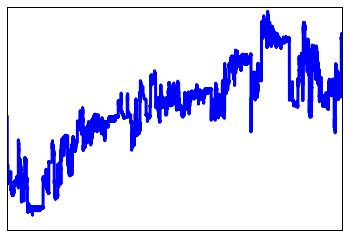

In [8]:
test = glitchless
test_index = np.arange(start=0, stop=1, step=1 / test.shape[0])
# Plot outputs
nth_sample = 1
plt.plot(test_index[0::nth_sample], clf.predict(test[0::nth_sample]), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())